In [1]:
try:
    import reinforce
except ModuleNotFoundError:
    ! pip install -e ../

In [2]:
from reinforce.params import get_params
from reinforce.reinforce import wrapper

In [3]:
# all cmdline_params are provided via config.yaml file, so we pass an empty dict to it
params = get_params('./config.yaml', cmdline_params={})
params

{'env_name': 'CartPole-v1',
 'experiment_name': 'cartpole_101',
 'gamma': 1.0,
 'generate_config': False,
 'lr': 0.01,
 'max_t': 1000,
 'n_episodes': 1000,
 'print_every': 100,
 'seed': 101,
 'score_threshold': 475.0,
 'policy_fc_units': [12, 12]}

In [4]:
scores, scores_window, grad_info = wrapper(params)

Episode 100	Average Score: 23.35  min/max grad: 0.00/16.15  grad amp.: 24.01
Episode 200	Average Score: 20.24  min/max grad: 0.00/27.59  grad amp.: 44.70
Episode 300	Average Score: 20.55  min/max grad: 0.00/16.32  grad amp.: 47.87
Episode 400	Average Score: 28.62  min/max grad: 0.00/36.71  grad amp.: 109.09
Episode 500	Average Score: 42.85  min/max grad: 0.00/107.19  grad amp.: 260.27
Episode 600	Average Score: 95.77  min/max grad: 0.00/5004.32  grad amp.: 10325.89
Episode 700	Average Score: 90.62  min/max grad: 0.00/757.23  grad amp.: 1585.71
Episode 800	Average Score: 117.75  min/max grad: 0.00/366.51  grad amp.: 679.93
Episode 900	Average Score: 76.56  min/max grad: 0.00/1323.73  grad amp.: 2607.32
Episode 1000	Average Score: 127.49  min/max grad: 0.00/2688.60  grad amp.: 4442.15


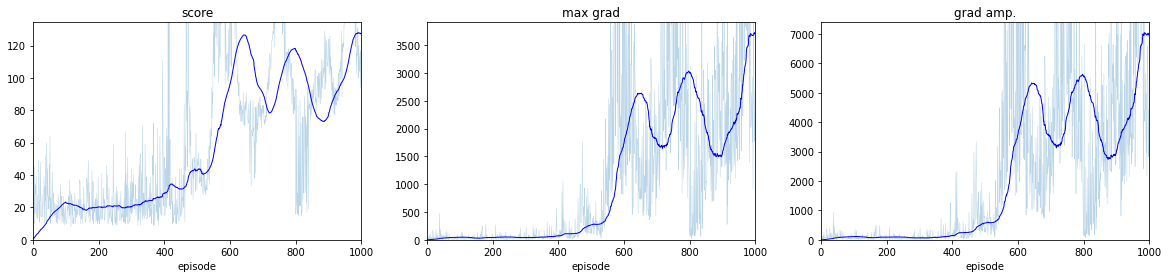

In [5]:
import matplotlib.pyplot as plt
import numpy as np

conv = lambda x: np.convolve(x, np.ones(100) / 100)

def plot(ax, v, title, kwargs1, kwargs2):
    ax.plot(v, **kwargs1)
    ax.plot(conv(v), 'b', **kwargs2)
    ax.set_xlim(0, len(v))
    ax.set_ylim(0, 1.05 * max(conv(v)))
    ax.set_title(title)
    ax.set_xlabel('episode')

fig, axes = plt.subplots(1, 3, figsize=(20, 4))
ax1, ax2, ax3 = axes

kwargs1 = {'alpha': 0.3, 'lw': 0.5}
kwargs2 = {'lw': 1.0}

plot(ax1, scores, 'score', kwargs1, kwargs2)
plot(ax2, grad_info.max_grad, 'max grad', kwargs1, kwargs2)
plot(ax3, grad_info.grad_amplitude, 'grad amp.', kwargs1, kwargs2)
plt.savefig('cartpole.png')